 # **تمرین مربوط به جلسه اول**


 نمایش خوشه ای نرخ بازدهی برای طلا


In [ ]:
import pandas as pd
import yfinance as yf
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

# Define the stock specifications
stock_symbol = "GC=F"
start_date = "2019-01-01"
end_date = "2022-09-01"

# Download the stock data from Yahoo Finance
df = yf.download(stock_symbol, start=start_date, end=end_date)

#Return_Daily=V_(today-V_yesterday )/V_yesterday *100

# Calculate the daily returns
df['Returns'] = df['Close'].pct_change()

# Drop the first row (which has a NaN value)
df = df.dropna()

# Preprocess the data
X = df[['Returns']]
X = (X - X.mean()) / X.std()  # Standardize the data

# Split the data into training and test sets
X_train, X_test = train_test_split(X, test_size=0.2, random_state=0)

# Perform KMeans clustering on the training set
kmeans = KMeans(n_clusters=10, random_state=0).fit(X_train)
X_train['Cluster'] = kmeans.labels_

# Apply the clustering to the test set
X_test['Cluster'] = kmeans.predict(X_test)

# Plot the clusters on the training and test sets
fig, axs = plt.subplots(ncols=2, figsize=(15, 5))
sns.scatterplot(data=X_train, x=X_train.index, y='Returns', hue='Cluster', palette='bright', ax=axs[0])
sns.scatterplot(data=X_test, x=X_test.index, y='Returns', hue='Cluster', palette='bright', ax=axs[1])
axs[0].set(title='Training Set')
axs[1].set(title='Test Set')
plt.show()



# Evaluate the performance of KMeans on the training set using Silhouette

from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

def find_best_n_clusters(X):
    silhouette_scores = []
    for k in range(2, 10):
        kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
        silhouette_scores.append(silhouette_score(X, kmeans.labels_))
    best_n_clusters = silhouette_scores.index(max(silhouette_scores)) + 2
    return best_n_clusters

# Find the best number of clusters for training data
best_n_clusters_train = find_best_n_clusters(X_train)

# Fit KMeans with the best number of clusters for training data
kmeans_train = KMeans(n_clusters=best_n_clusters_train)
kmeans_train.fit(X_train)

# Find the best number of clusters for test data
best_n_clusters_test = find_best_n_clusters(X_test)

# Fit KMeans with the best number of clusters for test data
kmeans_test = KMeans(n_clusters=best_n_clusters_test)
kmeans_test.fit(X_test)

# Get the labels for test data
test_cluster_labels = kmeans_test.labels_
test_label=print(test_cluster_labels)

# Plot the evaluation metrics for training data
silhouette_scores_train = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X_train)
    silhouette_scores_train.append(silhouette_score(X_train, kmeans.labels_))


scores=print(silhouette_scores_train)

sns.lineplot(x=range(2, 10), y=silhouette_scores_train)
plt.plot(best_n_clusters_train, silhouette_scores_train[best_n_clusters_train-2], 'ro', markersize=8)
plt.title('Silhouette Score (Training Data)')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()






# **تمرین مربوط به جلسه دوم**

تخمین بازده با استفاده از کلاسترینگ


In [ ]:
import pandas as pd
import yfinance as yf
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

# Define the stock specifications
stock_symbol = "GC=F"
start_date = "2018-01-01"
end_date = "2022-09-01"

# Download the stock data from Yahoo Finance
df = yf.download(stock_symbol, start=start_date, end=end_date)

#Return_Daily=V_(today-V_yesterday )/V_yesterday *100

# Calculate the daily returns
df['Returns'] = df['Close'].pct_change()

# Drop the first row (which has a NaN value)
df = df.dropna()

# Preprocess the data
X = df[['Returns']]
X = (X - X.mean()) / X.std()  # Standardize the data

# Split the data into training and test sets
X_train, X_test = train_test_split(X, test_size=0.2, random_state=0)

# Perform KMeans clustering on the training set
kmeans = KMeans(n_clusters=8, random_state=0).fit(X_train)
X_train['Cluster'] = kmeans.labels_

# Apply the clustering to the test set
X_test['Cluster'] = kmeans.predict(X_test)



# Calculate the average returns for each cluster
cluster_returns = X_train.groupby('Cluster')['Returns'].mean()
print(cluster_returns)

# Calculate the population of each cluster
cluster_population = X_train['Cluster'].value_counts()
print(cluster_population)


# Plot the cluster returns and population
fig, axs = plt.subplots(ncols=2, figsize=(15, 5))

sns.barplot(x=cluster_returns.index, y=cluster_returns.values, palette='bright', ax=axs[0])
sns.barplot(x=cluster_population.index, y=cluster_population.values, palette='bright', ax=axs[1])

axs[0].set(title='Average Returns by Cluster')

axs[1].set(title='Population by Cluster')

plt.show()



# Calculate the correlation matrix
corr_matrix = X_train.corr()

# Plot the heatmap
fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=ax)
plt.title('Correlation Heatmap')
plt.show()


# Visualize the distribution of returns for each cluster using a box plot
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(data=X_train, x='Cluster', y='Returns', palette='bright')
plt.title('Distribution of Returns for Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Returns')
plt.show()

# **تمرین مربوط به جلسه سوم**

خرید و فروش با استفاده از کلاسترینگ

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Set the stock symbol, start date, and end date
stock_symbol = "GC=F"
start_date = "2018-01-01"
end_date = "2022-09-01"

# Download the stock data from Yahoo Finance
df = yf.download(stock_symbol, start=start_date, end=end_date)

# Calculate the percentage return of the closing price
df['pct_return'] = df['Adj Close'].pct_change()

# Remove the first row (which contains NaN values)
df.dropna(inplace=True)
# Perform k-means clustering with k=9
X = np.array(df['pct_return']).reshape(-1, 1)

kmeans = KMeans(n_clusters=8, random_state=28).fit(X)

# Define a function to calculate the cluster boundaries using the samples closest to the cluster center
def calculate_cluster_boundaries(cluster_indices, cluster_center):
    cluster_distances = np.abs(X[cluster_indices] - cluster_center)
    min_distance = np.min(cluster_distances)
    max_distance = np.max(cluster_distances)
    return min_distance, max_distance



# Add the cluster labels to the dataframe
df['cluster'] = kmeans.labels_

# Calculate the boundaries for each cluster

cluster_boundaries = {}

for i in range(8):
    cluster_indices = np.where(kmeans.labels_ == i)[0]
    cluster_center = kmeans.cluster_centers_[i]
    min_distance, max_distance = calculate_cluster_boundaries(cluster_indices, cluster_center)
    cluster_boundaries[i] = [min_distance, max_distance]

df['boundaries'] = df['cluster'].map(cluster_boundaries)

# Calculate the signals
df['signals'] = np.where(df['pct_return'] < df['boundaries'].apply(lambda x: x[0]), -1, np.where(df['pct_return'] > df['boundaries'].apply(lambda x: x[1]), 1, 0))

# Plot the signals
plt.figure(figsize=(16,8))
plt.plot(df['Adj Close'], label='Price')
plt.plot(df[df['signals'] == 1]['Adj Close'], marker='^', markersize=10, color='g', label='Buy')
plt.plot(df[df['signals'] == -1]['Adj Close'], marker='v', markersize=10, color='r', label='Sell')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title(f'{stock_symbol} Buy/Sell Signals')
plt.legend()
plt.show()

# **تمرین مربوط به جلسه چهارم**
کلاسیفیکیشن با استفاده از درخت تصمیم برای
 داده های مربوط به طلا

In [ ]:
import yfinance as yf
import numpy as np
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

ticker = "GC=F"
start_date = "2020-06-30"
end_date = "2023-06-30"


data = yf.download(ticker, start=start_date, end=end_date)


data['Return'] = data['Close'].pct_change().shift(-1)


data.dropna(inplace=True)


X = np.array(data['Return']).reshape(-1, 1)
y = np.where(data['Return'].shift(-1) > 0, 1, 0)


split = int(0.8 * len(data))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


model = DecisionTreeClassifier()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


buy_dates = []
sell_dates = []
buy_prices = []
sell_prices = []
shares = 0
for i in range(len(y_pred)):
    if y_pred[i] == 1:
        if shares == 0:
            buy_dates.append(data.index[i+split])
            buy_prices.append(data['Close'][i+split])
        shares += 10000 / data['Close'][i+split]
    else:
        if shares > 0:
            sell_dates.append(data.index[i+split])
            sell_prices.append(data['Close'][i+split])
        shares = 0


plt.figure(figsize=(10, 6))
plt.plot(data.index[split:], data['Close'][split:], label='Price')
rolling_mean = data['Close'].rolling(window=20).mean()
plt.plot(data.index[split:], rolling_mean[split:], label='Moving Average (20 days)')
rolling_mean = data['Close'].rolling(window=50).mean()
plt.plot(data.index[split:], rolling_mean[split:], label='Moving Average (50 days)')
plt.plot(buy_dates, buy_prices, 'g^', markersize=10, label='Buy')
plt.plot(sell_dates, sell_prices, 'rv', markersize=10, label='Sell')
plt.legend()
plt.title(f"{ticker} Stock Trading Decisions")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()


plt.figure(figsize=(10, 6))
plt.plot(data.index[split:], y_test, label='Actual')
plt.plot(data.index[split:], y_pred, label='Predicted')
plt.legend()
plt.title(f"{ticker} Stock Price Prediction")
plt.xlabel("Date")
plt.ylabel("Prediction")
plt.show()



# **تمرین مربوط به جلسه پنجم**

محاسبه سود و زیان (PnL) و سود و زیان تجمعی (Cumulative PnL)
برای طلا

In [ ]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np

# مقدار سرمایه اولیه
initial_trade = 1000

# دریافت داده های بازار سهام برای نماد DXY از تاریخ شروع تا تاریخ پایان
stock_data = yf.download("GC=F", start="2011-01-01", end="2022-06-23")

# محاسبه بازده روزانه برای هر روز
stock_returns = stock_data['Adj Close'].pct_change()

# تولید سیگنال های خرید و فروش
signals = pd.DataFrame(index=stock_returns.index)
signals['signal'] = 0.0
signals['signal'] = np.where(stock_returns > 0, 1.0, 0.0)
signals['positions'] = signals['signal'].diff()


# تعیین موقعیت در بازار برای هر روز
df = pd.DataFrame(index=stock_returns.index)
df['signal'] = signals['signal']
df['position'] = signals['positions']
df.fillna(method='ffill', inplace=True)


# محاسبه سود و زیان (PnL) و سود و زیان تجمعی (Cumulative PnL)
df['returns'] = stock_returns

df['PnL'] = df['position'] * df['returns'] * initial_trade

df['Cumulative PnL'] = df['PnL'].cumsum()
print(df['PnL'] )
print(print(df['PnL'] ))


# نمودار سود و زیان تجمعی
plt.plot(df['PnL'])
plt.xlabel('Date')
plt.ylabel('PnL')
plt.title(' PnL for GC=F')
plt.show()

# تابع ارزیابی سیستم معاملاتی
def evaluate_trading_system(df):
    # محاسبه سود خالص
    net_profit = df['PnL'].sum()
        # محاسبه نرخ برد و باخت
    num_trades = len(df[df['position'] != 0])





    win_trades = len(df[df['PnL'] > 0])
    loss_trades = len(df[df['PnL'] < 0])
    win_rate = win_trades / num_trades
    loss_rate = loss_trades / num_trades

    # محاسبه نسبت ریسک به پاداش
    avg_win = df[df['PnL'] > 0]['PnL'].mean()
    avg_loss = df[df['PnL'] < 0]['PnL'].mean()


    risk_reward_ratio = abs(avg_win / avg_loss)

    # محاسبه بیشترین کاهش
    max_drawdown = abs(df['Cumulative PnL'].min())

    # چاپ معیارهای سیستم معاملاتی
    print('Net Profit: $', round(net_profit, 2))
    print('Win Rate: ', round(win_rate, 2))
    print('Loss Rate: ', round(loss_rate, 2))
    print('Risk-Reward Ratio: ', round(risk_reward_ratio, 2))
    print('Max Drawdown: $', round(max_drawdown, 2))

# ارزیابی سیستم معاملاتی
evaluate_trading_system(df)


# **تمرین مربوط به جلسه ششم**

محاسبه بازده روزانه و بازده سرمایه‌گذاری تجمعی برای هر دارایی بر اساس سیگنال‌های خرید و فروش.
نمودارسازی منحنی سرمایه و سیگنال‌های خرید و فروش برای هر دارایی.

In [ ]:
import yfinance as yf
!pip install ta
import ta
import matplotlib.pyplot as plt

# Define the digital asset symbols and the start and end dates for downloading historical data

# Define the parameters
symbol1 = 'GC=F'
symbol2 = 'JPY=X'
start_date = '2020-06-01'
end_date = '2023-06-01'

short_window = 10
long_window = 30

# sma: data['close'].rolling(window_size=30).mean()

# Download historical data for both digital assets
data1 = yf.download(symbol1, start=start_date, end=end_date)
data2 = yf.download(symbol2, start=start_date, end=end_date)

# Calculate short-term and long-term SMAs for both digital assets

data1['sma_short'] = ta.trend.sma_indicator(data1['Close'], window=short_window)
data1['sma_long'] = ta.trend.sma_indicator(data1['Close'], window=long_window)

data2['sma_short'] = ta.trend.sma_indicator(data2['Close'], window=short_window)
data2['sma_long'] = ta.trend.sma_indicator(data2['Close'], window=long_window)

# Generate buy and sell signals based on the short-term and long-term SMAs
data1['signal'] = 0

# boleain:  data1['sma_short'] >< data1['sma_long']=condition

# data1.loc[condition, 'signal'] = 1 or -1

data1.loc[data1['sma_short'] > data1['sma_long'], 'signal'] = 1
data1.loc[data1['sma_short'] < data1['sma_long'], 'signal'] = -1

data2['signal'] = 0

data2.loc[data2['sma_short'] > data2['sma_long'], 'signal'] = 1
data2.loc[data2['sma_short'] < data2['sma_long'], 'signal'] = -1

# Calculate daily returns and cumulative investment returns for both digital assets
data1['returns'] = data1['Close'].pct_change() * data1['signal'].shift(1)

data1['daily_returns'] = data1['returns'] / data1['Close'].shift(1)  # Normalized return

data1['cumulative_returns'] = (1 + data1['returns']).cumprod() * 100

data2['returns'] = data2['Close'].pct_change() * data2['signal'].shift(1)
data2['daily_returns'] = data2['returns'] / data2['Close'].shift(1)
data2['cumulative_returns'] = (1 + data2['returns']).cumprod() * 100

# Plot the equity curve and buy/sell signals
plt.figure(figsize=(12, 8))
plt.plot(data1['cumulative_returns'], label=symbol1)
plt.plot(data2['cumulative_returns'], label=symbol2)
plt.title('Simple Moving Average Trading Strategy')
plt.xlabel('Date')
plt.ylabel('Equity')
plt.legend()
plt.show()

# Plot the equity curve and buy/sell signals for each digital asset
fig, axs = plt.subplots(2, 1, figsize=(12, 8))

axs[0].plot(data1.index, data1['Close'], label=symbol1)
axs[0].plot(data1.index, data1['sma_short'], label='SMA Short')
axs[0].plot(data1.index, data1['sma_long'], label='SMA Long')

axs[0].scatter(data1[data1['signal'] == 1].index, data1[data1['signal'] == 1]['Close'], marker='^', color='green', label='Buy')
axs[0].scatter(data1[data1['signal'] ==-1].index, data1[data1['signal'] == -1]['Close'], marker='v', color='red', label='Sell')
axs[0].set_title('Simple Moving Average Trading Strategy for ' + symbol1)
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Price')
axs[0].legend()

axs[1].plot(data2.index, data2['Close'], label=symbol2)
axs[1].plot(data2.index, data2['sma_short'], label='SMA Short')
axs[1].plot(data2.index, data2['sma_long'], label='SMA Long')
axs[1].scatter(data2[data2['signal'] == 1].index, data2[data2['signal'] == 1]['Close'], marker='^', color='green', label='Buy')
axs[1].scatter(data2[data2['signal'] == -1].index, data2[data2['signal'] == -1]['Close'], marker='v', color='red', label='Sell')
axs[1].set_title('Simple Moving Average Trading Strategy for ' + symbol2)
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Price')
axs[1].legend()

plt.show()



# **تمرین مربوط به جلسه هفتم**

 با اجرای این کد، می‌توانید داده‌ها و نمودارهای مربوط به قیمت طلا و شاخص‌های تحلیل تکنیکال

 RSI و MACD

 را مشاهده کنید.



In [ ]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

# Define the stock specifications
stock_symbol = "GC=F"
start_date = "2018-01-01"
end_date = "2022-09-01"

# Download the stock data from Yahoo Finance
df = yf.download(stock_symbol, start=start_date, end=end_date)

# RSI = 100 - (100 / (1 + RS))

# Calculate the indicators
def calculate_rsi(close_prices, window_length=14):
    diff = close_prices.diff(1).dropna()
    up_chg = 0 * diff
    down_chg = 0 * diff
    up_chg[diff > 0] = diff[diff > 0]
    down_chg[diff < 0] = diff[diff < 0]

    up_chg_avg = up_chg.ewm(com=window_length - 1, min_periods=window_length).mean() # Average gain

    down_chg_avg = down_chg.ewm(com=window_length - 1, min_periods=window_length).mean() # Average loss

    rs = abs(up_chg_avg / down_chg_avg)
    rsi = 100 - 100 / (1 + rs)

    return rsi.reindex(close_prices.index)

def calculate_macd(close_prices, fast_period=12, slow_period=26, signal_period=9):
    exp1 = close_prices.ewm(span=fast_period, adjust=False).mean()
    exp2 = close_prices.ewm(span=slow_period, adjust=False).mean()
    macd = exp1 - exp2
    signal = macd.ewm(span=signal_period, adjust=False).mean()
    hist = macd - signal
    return macd, signal, hist

rsi = calculate_rsi(df['Close'])

macd, macdsignal, macdhist = calculate_macd(df['Close'])

# Plot the stock price and the indicators
fig, axs = plt.subplots(3, sharex=True, figsize=(15,10))
axs[0].plot(df.index, df['Close'])
axs[0].set_ylabel('Price')
axs[0].set_title('Gold Price')
axs[1].plot(rsi.index, rsi.values)
axs[1].axhline(y=30, color='r', linestyle='--', label='RSI Threshold 30')
axs[1].axhline(y=70, color='g', linestyle='--', label='RSI Threshold 70')
axs[1].set_ylabel('RSI')
axs[1].legend()
axs[1].set_title('Gold RSI')
axs[2].plot(df.index, macd, label='MACD')
axs[2].plot(df.index, macdsignal, label='Signal')
axs[2].bar(df.index, macdhist, label='Histogram')
axs[2].set_ylabel('MACD')
axs[2].legend()
axs[2].set_title('Gold MACD')

plt.show()

# **تمرین مربوط به جلسه هشتم**

نمودار قیمت طلا: نمایش قیمت روزانه طلا در بازه زمانی مشخص شده.

نمودار ایچیموکو: استفاده از ایچیموکو کینکو هیو تکنیک برای نمایش خطوط تنکان‌سن (Tenkan-sen) و کیجون‌سن (Kijun-sen) به همراه ابرهای سنکو-اسپن A و B.

نمودار چیکو-اسپن: نشان دهنده مکان قیمت فعلی نسبت به قیمت 26 روز قبل است.

نمودار باندهای بولینجر: استفاده از باندهای بولینجر برای نشان دادن نوسانات قیمت و محدوده قیمتی متوسط.

[*********************100%%**********************]  1 of 1 completed

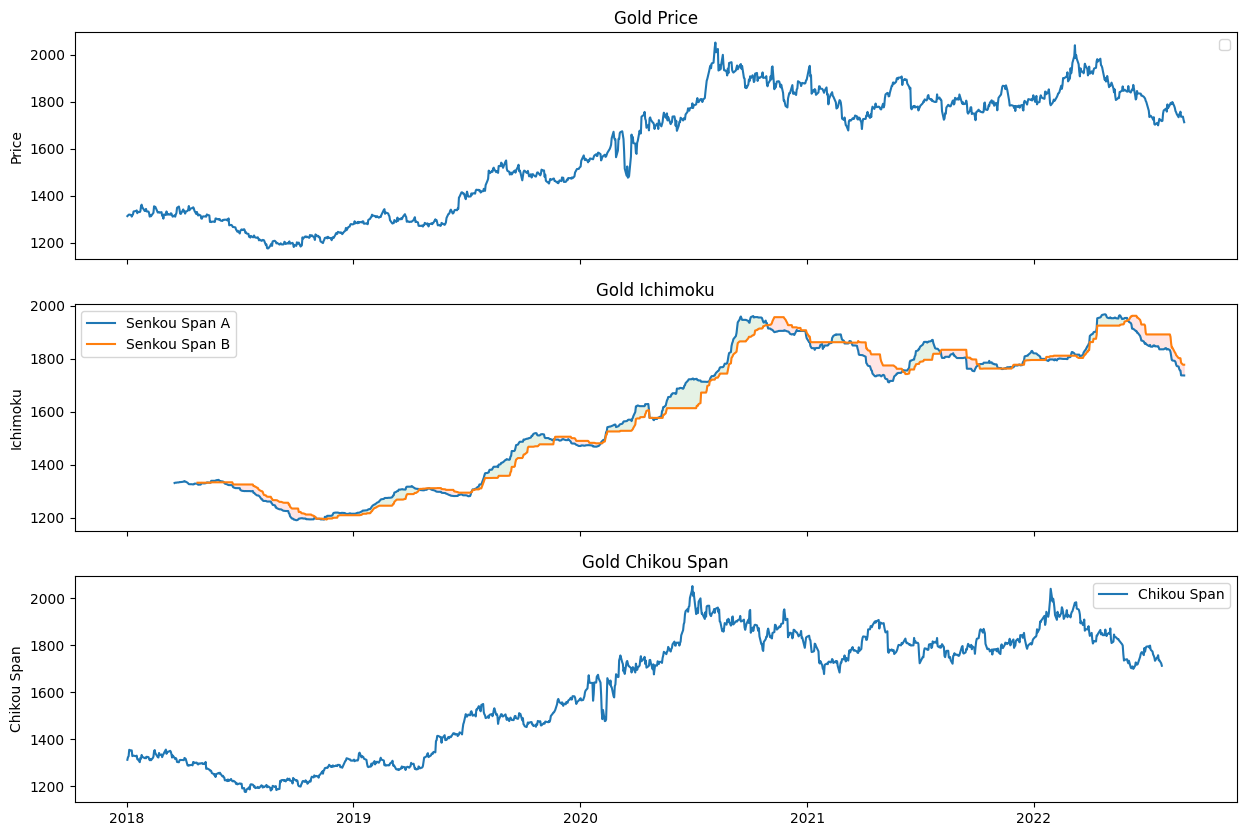

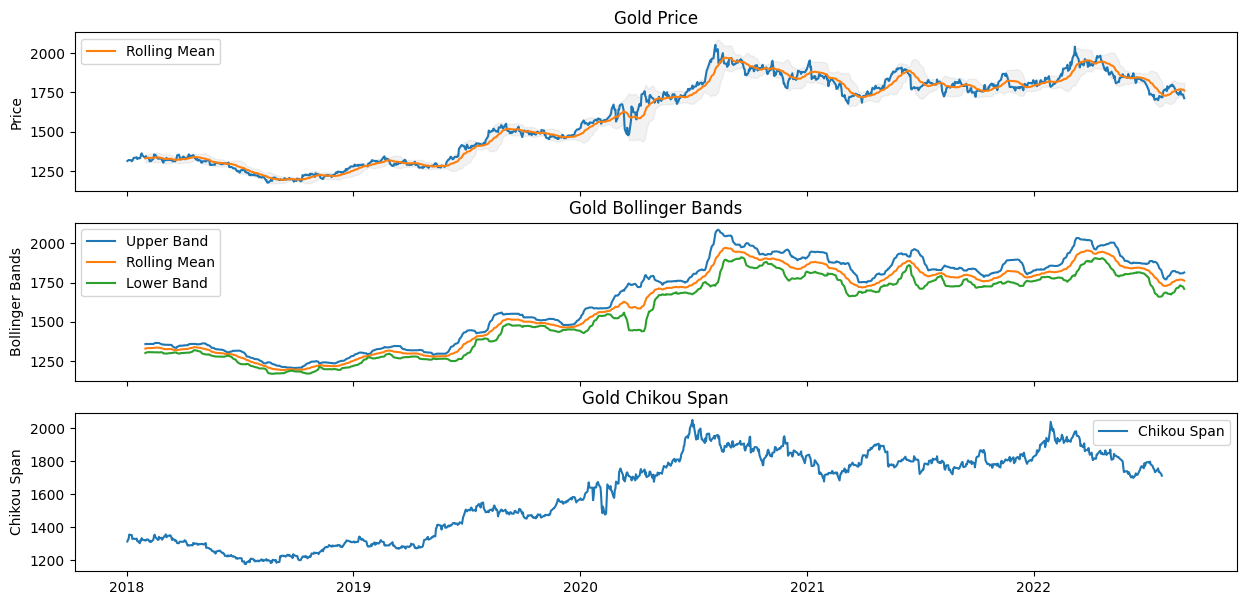

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define the stock specifications
stock_symbol = "GC=F"
start_date = "2018-01-01"
end_date = "2022-09-01"

# Download the stock data from Yahoo Finance
df = yf.download(stock_symbol, start=start_date, end=end_date)

def calculate_tenkan_sen(high_prices, low_prices, window_length=9):
    tenkan_sen = (high_prices.rolling(window=window_length).max() + low_prices.rolling(window=window_length).min()) / 2
    return tenkan_sen

def calculate_kijun_sen(high_prices, low_prices, window_length=26):
    kijun_sen = (high_prices.rolling(window=window_length).max() + low_prices.rolling(window=window_length).min()) / 2
    return kijun_sen

def calculate_senkou_span_a(tenkan_sen, kijun_sen):
    senkou_span_a = ((tenkan_sen + kijun_sen) / 2).shift(26)
    return senkou_span_a

def calculate_senkou_span_b(high_prices, low_prices, window_length=52):
    senkou_span_b = (high_prices.rolling(window=window_length).max() + low_prices.rolling(window=window_length).min()) / 2
    senkou_span_b = senkou_span_b.shift(26)
    return senkou_span_b

def calculate_chikou_span(close_prices, window_length=26):
    chikou_span = close_prices.shift(-window_length)
    return chikou_span

def calculate_bollinger_bands(close_prices, window_length=20, num_std=2):
    rolling_mean = close_prices.rolling(window=window_length).mean()
    rolling_std = close_prices.rolling(window=window_length).std()
    upper_band = rolling_mean + (num_std * rolling_std)
    lower_band = rolling_mean - (num_std * rolling_std)
    return upper_band, rolling_mean, lower_band

tenkan_sen = calculate_tenkan_sen(df['High'], df['Low'])
kijun_sen = calculate_kijun_sen(df['High'], df['Low'])
senkou_span_a = calculate_senkou_span_a(tenkan_sen, kijun_sen)
senkou_span_b = calculate_senkou_span_b(df['High'], df['Low'])
chikou_span = calculate_chikou_span(df['Close'])

# Plot the stock price and the indicators
fig, axs = plt.subplots(3, sharex=True, figsize=(15, 10))
axs[0].plot(df.index, df['Close'])
axs[0].set_ylabel('Price')
axs[0].set_title('Gold Price')
axs[0].legend()
axs[1].plot(df.index, senkou_span_a, label='Senkou Span A')
axs[1].plot(df.index, senkou_span_b, label='Senkou Span B')
axs[1].fill_between(df.index, senkou_span_a, senkou_span_b, where=senkou_span_a >= senkou_span_b, interpolate=True, alpha=0.1, color='green')
axs[1].fill_between(df.index, senkou_span_a, senkou_span_b, where=senkou_span_a < senkou_span_b, interpolate=True, alpha=0.1, color='red')
axs[1].set_ylabel('Ichimoku')
axs[1].set_title('Gold Ichimoku')
axs[1].legend()
axs[2].plot(df.index, chikou_span, label='Chikou Span')
axs[2].set_ylabel('Chikou Span')
axs[2].set_title('Gold Chikou Span')
axs[2].legend()
plt.show()

upper_band, rolling_mean, lower_band = calculate_bollinger_bands(df['Close'])
fig, axs = plt.subplots(3, sharex=True, figsize=(15, 7))
axs[0].plot(df.index, df['Close'])
axs[0].plot(rolling_mean.index, rolling_mean.values, label='Rolling Mean')
axs[0].fill_between(upper_band.index, upper_band.values, lower_band.values, alpha=0.1, color='grey')
axs[0].set_ylabel('Price')
axs[0].set_title('Gold Price')
axs[0].legend()
axs[1].plot(upper_band.index, upper_band.values, label='Upper Band')
axs[1].plot(rolling_mean.index, rolling_mean.values, label='Rolling Mean')
axs[1].plot(lower_band.index, lower_band.values, label='Lower Band')
axs[1].set_ylabel('Bollinger Bands')
axs[1].set_title('Gold Bollinger Bands')
axs[1].legend()
axs[2].plot(df.index, chikou_span, label='Chikou Span')
axs[2].set_ylabel('Chikou Span')
axs[2].set_title('Gold Chikou Span')
axs[2].legend()
plt.show()